In [1]:
from ml_utilities.deepsqueak_utils import DeepSqueak
from ml_utilities.audio_utils import Audio
import random

Load a Deep Squeak file and the associated audio file
The deep squeak file contains all detections found which have been found in the audio file

In [2]:
mat_path = 'audio/0cqg2z78itgi_44160250_11_303 May-15-2020  3_53 PM.mat'
audio_path = 'audio/0cqg2z78itgi_44160250_11_303.wav'
squeak = DeepSqueak(mat_path, audio_path)

Deep Squeak detections

In [3]:
# All Calls
squeak.Calls

{'calls': 15,
 'boxes': array([[1.00000000e-02, 3.95454545e+01, 1.02004000e-01, 5.95454545e+01],
        [1.02404000e-01, 7.04545455e+01, 1.76000000e-02, 1.31818182e+01],
        [2.07120966e-01, 2.27272727e+01, 7.20000000e-02, 7.63636364e+01],
        [3.62679448e-01, 1.72727273e+01, 6.72000000e-02, 8.18181818e+01],
        [5.50596414e-01, 3.81818182e+01, 8.48000000e-02, 6.09090909e+01],
        [7.38513379e-01, 3.00000000e+01, 9.76000000e-02, 6.90909091e+01],
        [9.42430345e-01, 4.00000000e+01, 7.52000000e-02, 5.90909091e+01],
        [1.24750579e+00, 4.09090909e+01, 9.76000000e-02, 5.81818182e+01],
        [1.58778124e+00, 7.63636364e+01, 7.52000000e-02, 2.27272727e+01],
        [1.74849821e+00, 3.31818182e+01, 1.00800000e-01, 6.59090909e+01],
        [2.10637366e+00, 3.90909091e+01, 7.04000000e-02, 6.00000000e+01],
        [2.27989062e+00, 7.18181818e+01, 4.64000000e-02, 2.45454545e+01],
        [2.58656607e+00, 2.00000000e+01, 1.04000000e-01, 7.90909091e+01],
        [2.7760

In [4]:
# Audio statistics for the associated audio
squeak.audio.get_statistics()

{'Mean amplitude': -1.5567179361979166e-05,
 'Max amplitude': 0.04974365234375,
 'Min amplitude': -0.0465087890625,
 'Samples': 750000,
 'Sample rate': 250000,
 'Duration': 3.0,
 'Mean norm': 0.0008755757242838542,
 'RMS amplitude': 0.00244775923322454}

In [5]:
call_number = 0
# Call meta data is stored in multiple arrays
box, power, score, accept = squeak.get_call(0)
# Dimensions of a single call, are expressed as a 2 dimensional time/frequency domain rectangle (boundary box)
start_time, min_freq, width_time, height_freq = box
print('Call Number {call_number}')
print(f'Start Time (seconds) {start_time} Duration (seconds) {width_time} Stop Time (seconds) {start_time + width_time}')
print(f'Low Frequency (kHz) {min_freq} Height (kHz) {height_freq} High Frequency (kHz) {min_freq + height_freq}')

# Score indicates confidence of a positive detection
# Power indicates the power of the vocalization (boundary box)
# Accept flag inidicates 1 if the vocalisation is considered correct 
print(f'Score: {score}, Power {power}, Accept {accept}')

# Audio for the specified call
trill = squeak.get_audio(0)

Call Number {call_number}
Start Time (seconds) 0.01 Duration (seconds) 0.102004 Stop Time (seconds) 0.11200399999999999
Low Frequency (kHz) 39.54545454545455 Height (kHz) 59.54545454545455 High Frequency (kHz) 99.0909090909091
Score: 0.879506528377533, Power -78.79864434050117, Accept 1


preslice: (25500,) 0 None 250000
slice: (25500,) > (25500,) 0 25499 (25500,) 250000


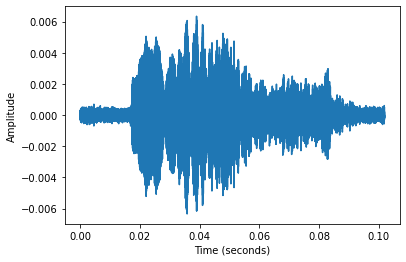

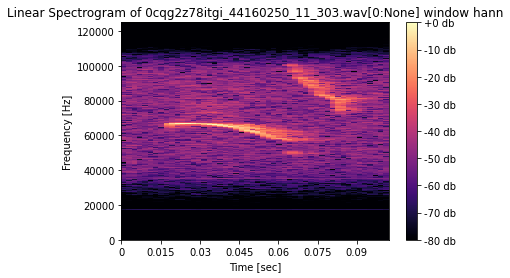

In [6]:
trill.plot_waveform()
trill.plot_linear_spectrogram()

# True Positive generation
Create a fake 'true positive' call by combining existing true call and background audio

In [9]:
background_audio_path = 'audio/20200428_091053.WAV'
background_audio = Audio.load_audio(background_audio_path).resample(250000)

In [11]:
random.seed(1234123123)
offset = random.randint(0, background_audio.samples - trill.samples)

# Blend foreground and background audio samples together, automatically matching RMS amplitude
mixed = background_audio.insert(trill, offset, True)

preslice: (500000,) 0 None 250000
slice: (500000,) > (500000,) 0 499999 (500000,) 250000


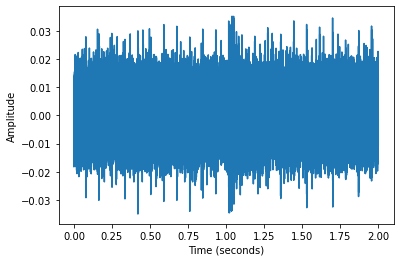

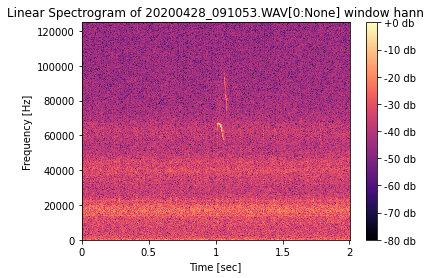

In [12]:
# Visualise the generated audio
mixed.trim(offset-background_audio.sample_rate, offset+background_audio.sample_rate).plot_waveform()
mixed.trim(offset-background_audio.sample_rate, offset+background_audio.sample_rate).plot_linear_spectrogram()